In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
np.random.seed(2018)

from sklearn.model_selection import GroupKFold

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from ml_metrics import rmsle

#https://www.kaggle.com/c/bike-sharing-demand/data

In [29]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.6 KB


In [32]:
train[train['count'] == train['count'].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.06,44,16.9979,91,886,977


# DATA VISUALISATION

<BarContainer object of 4 artists>

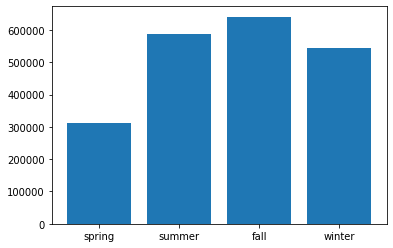

In [33]:
plt.bar(['spring','summer','fall','winter'], train.groupby('season')['count'].sum())


In [34]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek']  = train['datetime'].dt.dayofweek
train['weekofyear'] = train['datetime'].dt.weekofyear
train['weekend']    = train.dayofweek.map(lambda x: int(x in [5,6]) )
train['dayofyear']  = train['datetime'].dt.dayofyear
    
train['rush_hour'] = train['datetime'].apply(lambda i: min([np.fabs(9-i.hour), np.fabs(20-i.hour)]))
train.loc[:,('rush_hour')] = train['datetime'].apply(lambda i: np.fabs(14-i.hour))
    
train['peak'] = train[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 12)) or (x['workingday'] == 0 and  10 <= x['hour'] <= 19)], axis = 1)

C:\Users\Seba\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  del sys.path[0]


In [35]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,year,month,day,hour,dayofweek,weekofyear,weekend,dayofyear,rush_hour,peak
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,2011,1,1,0,5,52,1,1,14.0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,2011,1,1,1,5,52,1,1,13.0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,2011,1,1,2,5,52,1,1,12.0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,2011,1,1,3,5,52,1,1,11.0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,2011,1,1,4,5,52,1,1,10.0,0


<BarContainer object of 12 artists>

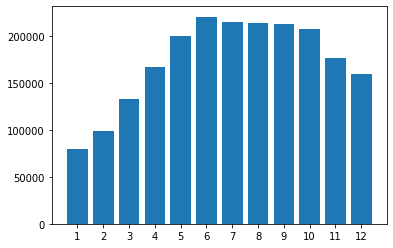

In [36]:
plt.bar([str(x) for x in range(1,13)],train.groupby('month')['count'].sum())

<BarContainer object of 7 artists>

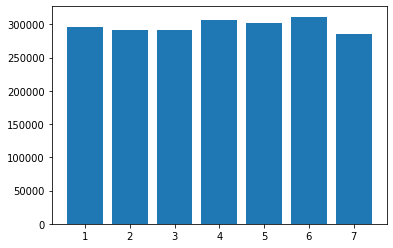

In [37]:
plt.bar([str(x) for x in range(1,8)],train.groupby('dayofweek')['count'].sum())

<BarContainer object of 2 artists>

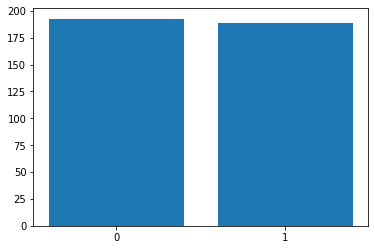

In [38]:
plt.bar(['0','1'],train.groupby('weekend')['count'].mean())



<BarContainer object of 24 artists>

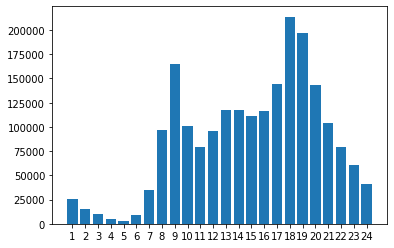

In [39]:
plt.bar([str(x) for x in range(1,25)],train.groupby('hour')['count'].sum())


<BarContainer object of 24 artists>

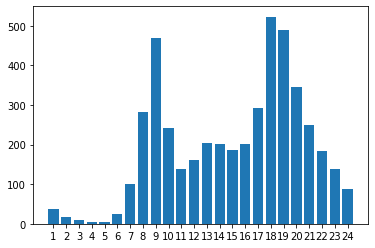

In [40]:
plt.bar([str(x) for x in range(1,25)],train[train['weekend'] == 0].groupby('hour')['count'].mean())


<BarContainer object of 24 artists>

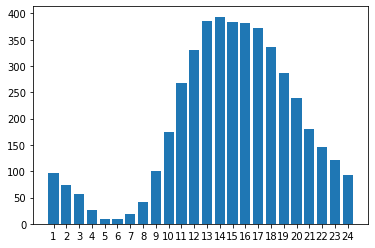

In [41]:
plt.bar([str(x) for x in range(1,25)],train[train['weekend'] == 1].groupby('hour')['count'].mean())


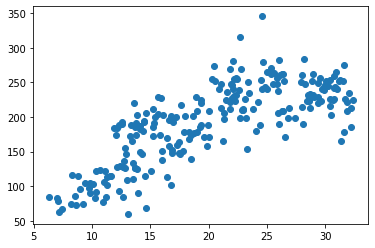

In [42]:
plt.scatter(train.groupby('dayofyear')['temp'].mean(),train.groupby('dayofyear')['count'].mean())

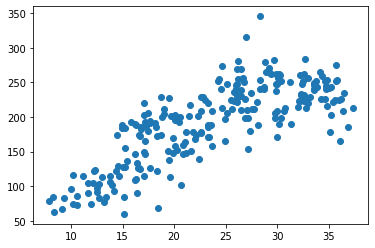

In [43]:
plt.scatter(train.groupby('dayofyear')['atemp'].mean(),train.groupby('dayofyear')['count'].mean())

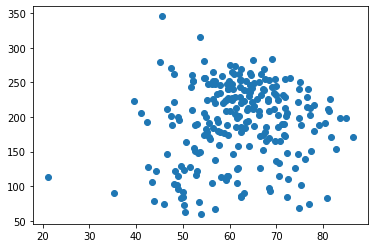

In [44]:
plt.scatter(train.groupby('dayofyear')['humidity'].mean(),train.groupby('dayofyear')['count'].mean())

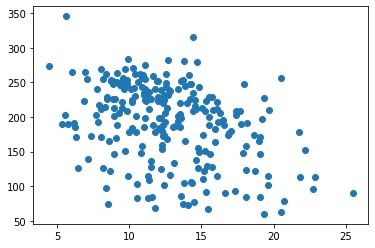

In [45]:
plt.scatter(train.groupby('dayofyear')['windspeed'].mean(),train.groupby('dayofyear')['count'].mean())

In [52]:
def get_feats(df,black_list=['count','registered','casual','datetime']):
    
    feats = [column for column in df if column not in black_list]
    return feats
    

# 1. Model Dummy 

In [53]:

feats = get_feats(train)
X = train[feats].values
y = train['count'].values
dummy = DummyRegressor(strategy='median')
dummy.fit(X,y)
y_pred = dummy.predict(X)


rmsle(y,y_pred)

1.4725894242962372

# 2. Decision Tree

In [54]:
feats = get_feats(train)
X = train[feats].values
y = train['count'].values
dtree = DecisionTreeRegressor(max_depth = 5, random_state=2019)
dtree.fit(X,y)
y_pred = dtree.predict(X)

rmsle(y_pred,y)

0.58578535862751

In [55]:
def custom_validation(df,target_variable = 'count', n_folds=3):
    X = train[feats].values
    y =train[target_variable].values
    
    groups = df['datetime'].dt.month.values
    group_kfold = GroupKFold(n_splits=n_folds)
    
    
    for train_idx, test_idx in group_kfold.split(X,y,groups):
        yield X[train_idx] , X[test_idx] , y[train_idx], y[test_idx]

In [56]:
models, scores = [], []

for idx, (X_train, X_test, y_train, y_test) in enumerate(custom_validation(train, feats)):
    model = DecisionTreeRegressor(max_depth=5, random_state=2018)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = rmsle(y_test, y_pred)
    
    models.append(model)
    scores.append(score)


np.mean(scores), np.std(scores)

(0.4768647766849094, 0.023686863686807967)

# Count = Registered + Casual

In [57]:
train[train['count'] != train['registered'] + train['casual']]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,year,month,day,hour,dayofweek,weekofyear,weekend,dayofyear,rush_hour,peak


In [58]:
groups = train['datetime'].dt.month.values
group_kfold = GroupKFold(n_splits=3)

X = train[feats].values
registered = train['registered'].values
casual = train['casual'].values
count = train['count']

scores=[]
for train_idx, test_idx in group_kfold.split(X, count, groups):
    
    model = DecisionTreeRegressor(max_depth=5, random_state=2018)
    model.fit(X[train_idx], registered[train_idx])
    registered_pred = model.predict(X[test_idx])
    
    model = DecisionTreeRegressor(max_depth=5, random_state=2018)
    model.fit(X[train_idx], casual[train_idx])
    casual_pred = model.predict(X[test_idx])
    
    count_pred =registered_pred+ casual_pred
    
    score = rmsle(count[test_idx], count_pred)
    scores.append(score)
    
np.mean(scores) , np.std(scores)
    
    


(0.5728863627676545, 0.014298834652646095)

# Logarithm transformation

In [59]:
offset_log=4
train['count_log'] = np.log2( train['count'] + offset_log )
train['registered_log'] = np.log2(train['registered'] + offset_log )
train['casual_log'] = np.log2( train['casual'] + offset_log )


In [60]:
groups = train['datetime'].dt.month.values
group_kfold = GroupKFold(n_splits=3)

X = train[feats].values
count = train['count']
offset_log = 6
count_log = np.log2(count+ offset_log)

scores=[]
for train_idx, test_idx in group_kfold.split(X, count, groups):
    
    model = DecisionTreeRegressor(max_depth=5, random_state=2018)
    model.fit(X[train_idx], count_log[train_idx])
    count_log_pred = model.predict(X[test_idx])
    count_pred = np.exp2(count_log_pred) - offset_log
    
    
    score = rmsle(count[test_idx], count_pred)
    scores.append(score)
    
np.mean(scores) , np.std(scores)

(0.5796629567383059, 0.013039692266126226)

In [61]:
groups = train['datetime'].dt.month.values
group_kfold = GroupKFold(n_splits=3)

X = train[feats].values
offset = 6
log_registered = np.log2(train['registered']+offset).values
log_casual = np.log2(train['casual']+offset).values
log_count = np.exp2(train['count'])

scores=[]
for train_idx, test_idx in group_kfold.split(X, log_count, groups):
    
    model = DecisionTreeRegressor(max_depth=5, random_state=2018)
    model.fit(X[train_idx], log_registered[train_idx])
    log_registered_pred = model.predict(X[test_idx])
    registered_pred = np.exp2(log_registered_pred)-offset
    
    model = DecisionTreeRegressor(max_depth=5, random_state=2018)
    model.fit(X[train_idx], log_casual[train_idx])
    log_casual_pred = model.predict(X[test_idx])
    casual_pred = np.exp2(log_casual_pred) -offset
    
    
    count_pred =registered_pred+ casual_pred
    
    score = rmsle(count[test_idx], count_pred)
    scores.append(score)
    
np.mean(scores) , np.std(scores)

(0.5540567329004928, 0.014911006557658842)

In [62]:
groups = train['datetime'].dt.month.values
group_kfold = GroupKFold(n_splits=3)

X = train[feats].values
offset = 6
log_registered = np.log2(train['registered']+offset).values
log_casual = np.log2(train['casual']+offset).values
log_count = np.log2(train['count']+offset)

scores=[]
for train_idx, test_idx in group_kfold.split(X, log_count, groups):
    
    model = DecisionTreeRegressor(max_depth=5, random_state=2018)
    model.fit(X[train_idx], log_registered[train_idx])
    log_registered_pred = model.predict(X[test_idx])
    registered_pred = np.exp2(log_registered_pred)-offset
    
    model = DecisionTreeRegressor(max_depth=5, random_state=2018)
    model.fit(X[train_idx], log_casual[train_idx])
    log_casual_pred = model.predict(X[test_idx])
    casual_pred = np.exp2(log_casual_pred) -offset
    
    model = DecisionTreeRegressor(max_depth=5, random_state=2018)
    model.fit(X[train_idx], log_count[train_idx])
    log_count_pred = model.predict(X[test_idx])
    count_pred1 = np.exp2(log_count_pred) -offset
    
    
    count_pred =0.7*(registered_pred+ casual_pred)+0.3*count_pred1
    
    score = rmsle(count[test_idx], count_pred)
    scores.append(score)
    
np.mean(scores) , np.std(scores)

(0.5497054329028471, 0.012162167441176932)

In [84]:
def get_models():
    return [
        ('dt', DecisionTreeRegressor(max_depth=5, random_state=2018)),
        ('rf', RandomForestRegressor(max_depth=8, n_estimators=50, random_state=2018)),
        
    ]

In [85]:
for model_name, model in get_models():
    scores=[]
    for X_train, X_test, y_train, y_test in custom_validation(train,feats):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred[y_pred<0] = 0
        score = rmsle(y_test, y_pred)
        scores.append(score)
    print("Model: {0}, scores-mean: {1}, scores-std: {2}".format(model_name, np.mean(scores), np.std(scores)))

Model: dt, scores-mean: 0.4768647766849094, scores-std: 0.023686863686807967
Model: rf, scores-mean: 0.40261049939305077, scores-std: 0.024140949791263838


In [45]:
def draw_importance_features(model, df, importance_type='gain'):

    fscore = model.get_booster().get_score(importance_type=importance_type) #cover, gain, weight
    maps_name = dict([ ("f{0}".format(i), col) for i, col in enumerate(df.columns)])

    impdf = pd.DataFrame([ {'feature': maps_name[k], 'importance': fscore[k]} for k in fscore ])
    impdf = impdf.sort_values(by='importance', ascending=False).reset_index(drop=True)
    impdf['importance'] /= impdf['importance'].sum()
    impdf.index = impdf['feature']

    impdf.plot(kind='bar', title='{0} - Importance Features'.format(importance_type.title()), figsize=(12, 4))

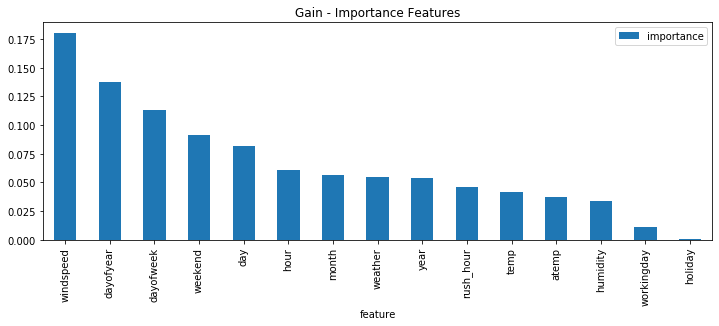

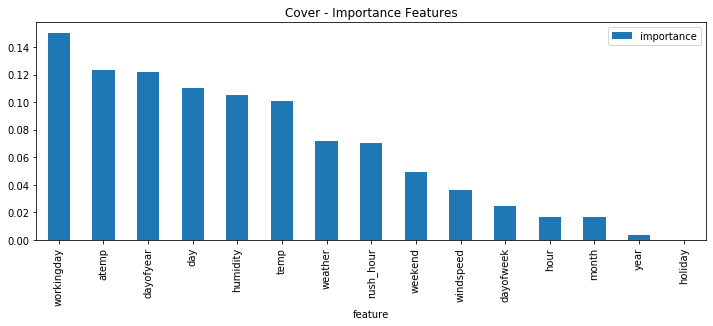

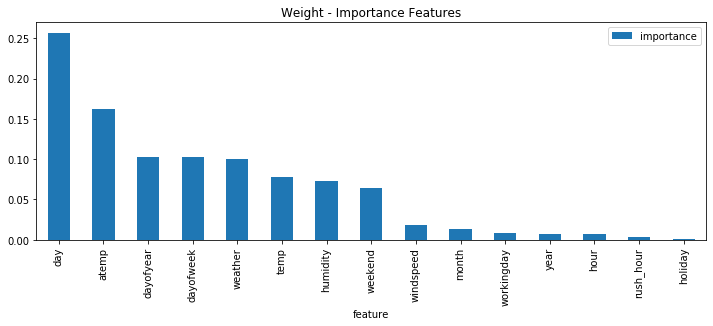

In [49]:
feats = get_feats(train)
draw_importance_features(model, train[feats], importance_type='gain')
draw_importance_features(model, train[feats], importance_type='cover')
draw_importance_features(model, train[feats], importance_type='weight')